In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12,6)
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
df_raw = pd.read_excel('../data/raw/Online Retail.xlsx')
df = df_raw.copy()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,"17,850.00",United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,"17,850.00",United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,"17,850.00",United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,"17,850.00",United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,"17,850.00",United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,"541,909.00",541909,"541,909.00","406,829.00"
mean,9.55,2011-07-04 13:34:57.156386048,4.61,"15,287.69"
min,"-80,995.00",2010-12-01 08:26:00,"-11,062.06","12,346.00"
25%,1.00,2011-03-28 11:34:00,1.25,"13,953.00"
50%,3.00,2011-07-19 17:17:00,2.08,"15,152.00"
75%,10.00,2011-10-19 11:27:00,4.13,"16,791.00"
max,"80,995.00",2011-12-09 12:50:00,"38,970.00","18,287.00"
std,218.08,NaN,96.76,"1,713.60"


In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
percent_lost = df['CustomerID'].isnull().sum() / len(df) * 100
print(f"Vamos remover {df['CustomerID'].isnull().sum()} linhas, que são {percent_lost:.2f}% do total.")

df.dropna(subset=['CustomerID'], inplace=True)

print(f"Forma nova do df: {df.shape}")
df.isnull().sum()

Vamos remover 135080 linhas, que são 24.93% do total.
Forma nova do df: (406829, 8)


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [7]:
df['CustomerID'] = df['CustomerID'].astype(int).astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [8]:
print(f"Linhas antes da limpeza de Quantidade {len(df)}")
df = df[df['Quantity'] > 0]
print(f"Linhas depois da limpeza de Quantidade {len(df)}")
df.describe()

Linhas antes da limpeza de Quantidade 406829
Linhas depois da limpeza de Quantidade 397924


,Quantity,InvoiceDate,UnitPrice
count,"397,924.00",397924,"397,924.00"
mean,13.02,2011-07-10 23:43:36.912475648,3.12
min,1.00,2010-12-01 08:26:00,0.00
25%,2.00,2011-04-07 11:12:00,1.25
50%,6.00,2011-07-31 14:39:00,1.95
75%,12.00,2011-10-20 14:33:00,3.75
max,"80,995.00",2011-12-09 12:50:00,"8,142.75"
std,180.42,NaN,22.10


In [11]:
print(f"Linhas antes da limpeza de Preço: {len(df)}")
df = df[df['UnitPrice'] >= 0.01]
print(f"Linhas depois da limpeza de Preço: {len(df)}")
df.describe()

Linhas antes da limpeza de Preço: 397884
Linhas depois da limpeza de Preço: 397880


,Quantity,InvoiceDate,UnitPrice
count,"397,880.00",397880,"397,880.00"
mean,12.99,2011-07-10 23:41:05.443248896,3.12
min,1.00,2010-12-01 08:26:00,0.04
25%,2.00,2011-04-07 11:12:00,1.25
50%,6.00,2011-07-31 14:39:00,1.95
75%,12.00,2011-10-20 14:33:00,3.75
max,"80,995.00",2011-12-09 12:50:00,"8,142.75"
std,179.33,NaN,22.10


In [14]:
print(f"Linhas duplicadas: {df.duplicated().sum()}")
df.drop_duplicates(inplace = True)
print(f"Forma final do df após remover duplicados: {df.shape}")

Linhas duplicadas: 0
Forma final do df após remover duplicados: (392688, 8)


C:\Users\Gordão Trem Bala\AppData\Local\Temp\ipykernel_3664\1106764822.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_countries.index, x=top_countries.values, palette="vlag")


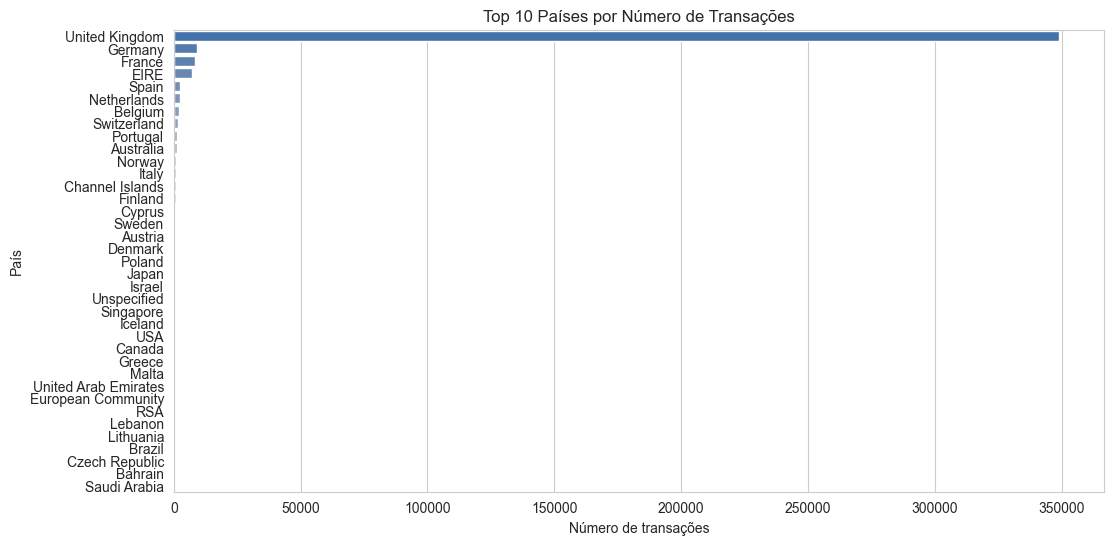

In [25]:
top_countries = df['Country'].value_counts().head(50)

sns.barplot(y=top_countries.index, x=top_countries.values, palette="vlag")
plt.title('Top 10 Países por Número de Transações')
plt.xlabel('Número de transações')
plt.ylabel('País')
plt.show()

In [26]:
df = df[df['Country'] == 'United Kingdom'].copy()
print(f"Focando apenas no UK, ficamos com {len(df)} registros.")

Focando apenas no UK, ficamos com 349199 registros.


In [ ]:
df['Hour'] = df['InvoiceDate'].dt.hour
df['Weekday'] = df['InvoiceDate'].dt.day_name()